## Annual Global Temperatures

This notebook serves as an Introduction to plotting with python. It shows the different approaches for creating an annual global temperatures plot, progressing from simple to more complex.

Let's start by loading the data into a dataframe and printing its structure.

In [1]:
from temperature import load_temperature_df
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = os.path.join("..", "data", "temperatures.csv")

df = load_temperature_df(filepath)
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for NaN or non-numeric values in the data
print("Checking data:")
print("Any NaN in Year?", df['Year'].isna().any())

print("Any NaN in Annual_Mean?", df['Annual_Mean'].isna().any())
print("Year dtype:", df['Year'].dtype)
print("Annual_Mean dtype:", df['Annual_Mean'].dtype)


Dataset shape: (146, 20)

First 5 rows:
        Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  \
0 1880-01-01 -0.20  -.25  -.09  -.16  -.09  -.21  -.20  -.10  -.15  -.23   
1 1881-01-01 -0.20  -.15   .02   .04   .07  -.19   .01  -.04  -.16  -.22   
2 1882-01-01  0.16   .14   .05  -.16  -.14  -.22  -.16  -.08  -.15  -.23   
3 1883-01-01 -0.29  -.36  -.12  -.18  -.17  -.07  -.07  -.14  -.22  -.11   
4 1884-01-01 -0.13  -.08  -.36  -.40  -.33  -.34  -.30  -.27  -.27  -.25   

    Nov   Dec   J-D   D-N   DJF   MAM   JJA   SON  Annual_Mean  
0  -.23  -.18  -.17   ***   ***  -.11  -.17  -.20        -0.17  
1  -.19  -.07  -.09  -.10  -.18   .04  -.07  -.19        -0.09  
2  -.17  -.36  -.11  -.09   .08  -.08  -.15  -.18        -0.11  
3  -.24  -.11  -.17  -.19  -.34  -.16  -.09  -.19        -0.17  
4  -.33  -.31  -.28  -.26  -.10  -.36  -.31  -.28        -0.28  
Checking data:
Any NaN in Year? False
Any NaN in Annual_Mean? True
Year dtype: datetime64[ns]
Annual_Mean dtype: 

In [2]:
df = df.dropna(subset=['Year', 'Annual_Mean'])
print("After dropping NaN values, shape:", df.shape)

After dropping NaN values, shape: (145, 20)


## Basic Plotting with pandas

The simplest way to create a plot is using pandas' built-in plotting capabilities. This approach requires minimal code but provides fewer customization options.

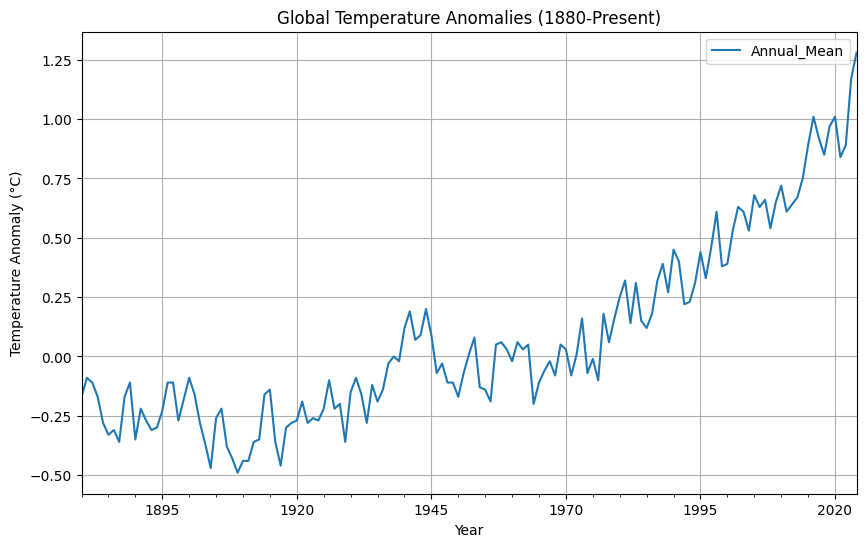

In [3]:
# Basic plot using pandas
df.plot(x='Year', y='Annual_Mean', figsize=(10, 6), title='Global Temperature Anomalies (1880-Present)')
plt.grid(True)
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

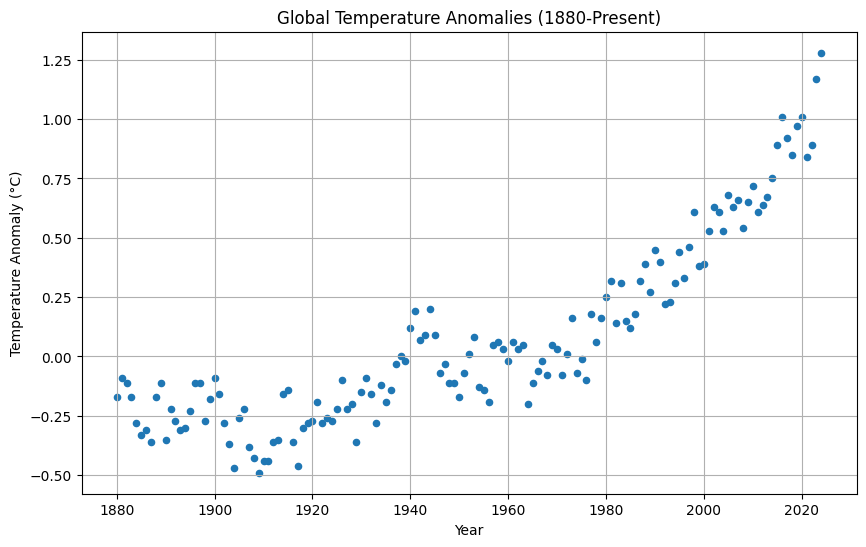

In [4]:
# Scatter plot using pandas
df.plot.scatter(x='Year', y='Annual_Mean', figsize=(10, 6), title='Global Temperature Anomalies (1880-Present)')
plt.grid(True)
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

## 2. Plotting with Matplotlib

Using Matplotlib directly gives us more control over the plot's appearance and features.
Here we create a more customized visualization using the `plt` object.

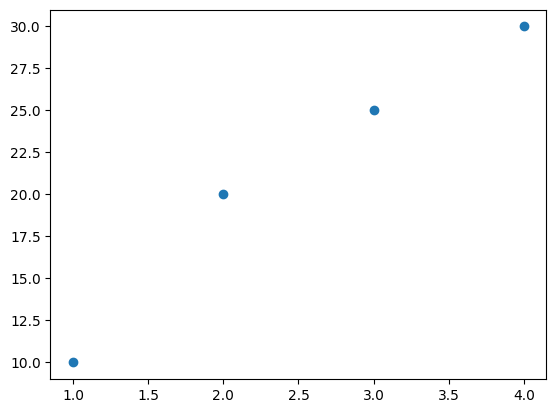

In [5]:
# Create a simple scatter plot with matplotlib
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
plt.plot(x, y, 'o')
plt.show()

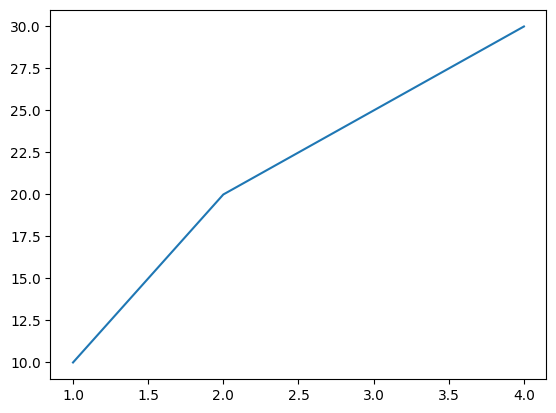

In [6]:
# Create a simple line plot with matplotlib
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
plt.plot(x, y, '-')
plt.show()

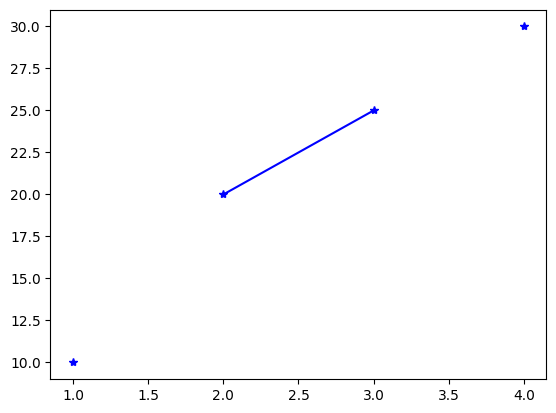

In [7]:
# mix and match line and markers
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
plt.plot(x, y, 'b*')
plt.plot(x[1:3], y[1:3], 'b-')
plt.show()

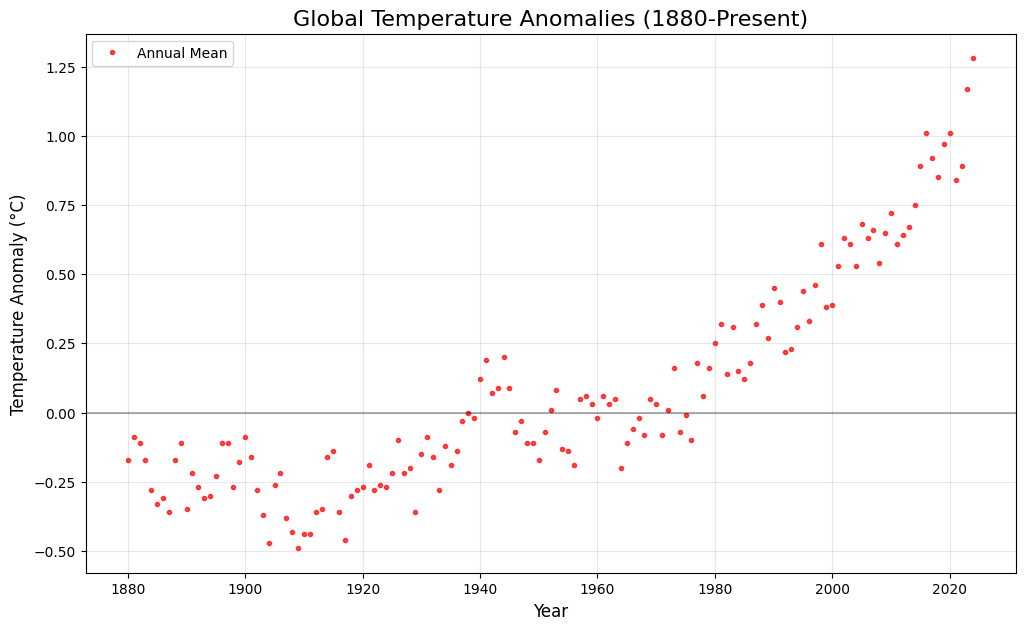

In [8]:
# Create figure with specified size
plt.figure(figsize=(12, 7))

# Plot the full data with custom styling
plt.plot(df['Year'], df['Annual_Mean'], 'o', color='red', 
         markersize=3, alpha=0.7, label='Annual Mean')

# Add a reference line at 0°C
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Customize the plot
plt.title('Global Temperature Anomalies (1880-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


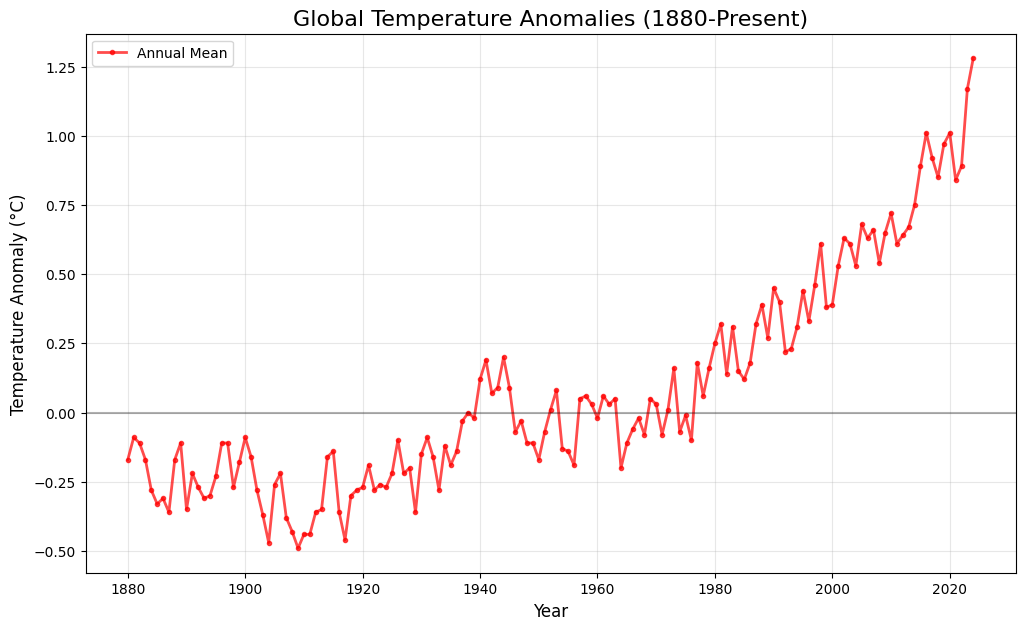

In [9]:
# Create figure with specified size
plt.figure(figsize=(12, 7))

# Plot the full data with custom styling
plt.plot(df['Year'], df['Annual_Mean'], linewidth=2.0, marker='o', color='red', 
         markersize=3, alpha=0.7, label='Annual Mean')

# Add a reference line at 0°C
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Customize the plot
plt.title('Global Temperature Anomalies (1880-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


Let's add a trendline

Trendline equation: y = 0.01x + -15.73


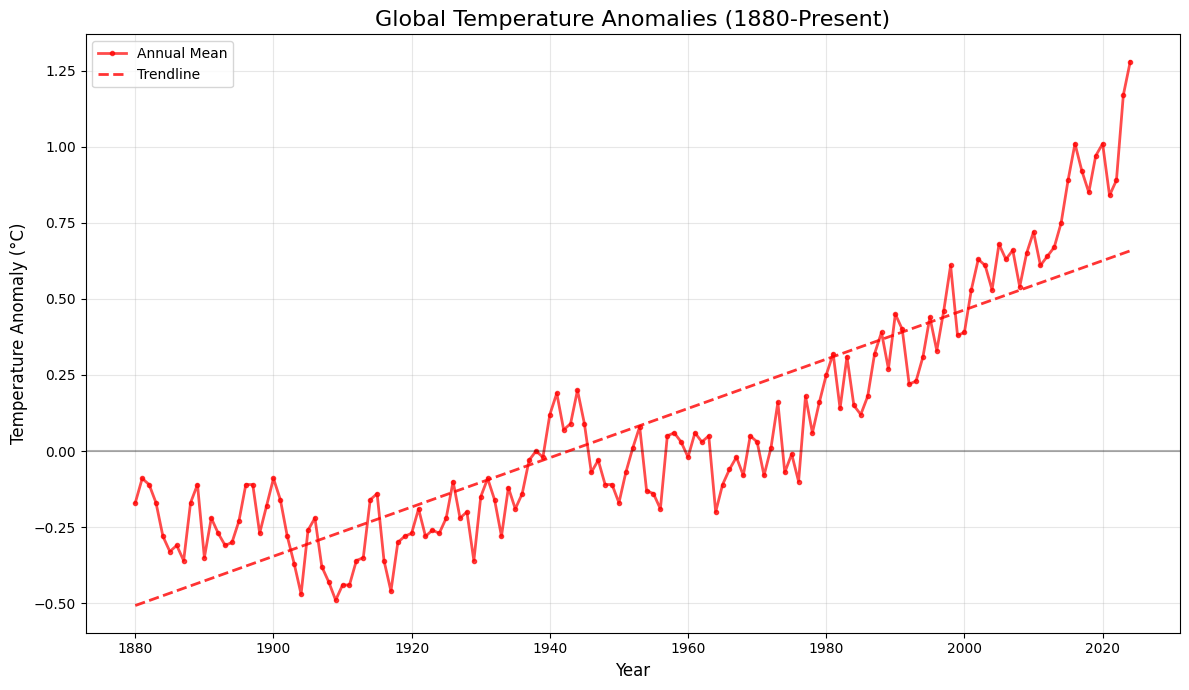

In [10]:
# Create figure with specified size
plt.figure(figsize=(12, 7))

# Plot the full data with custom styling
plt.plot(df['Year'], df['Annual_Mean'], color='red', linewidth=2.0, marker='o', 
         markersize=3, alpha=0.7, label='Annual Mean')

# Add a reference line at 0°C
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Convert to numeric to make sure polyfit can use it
years_numeric = df['Year'].dt.year.astype(float)
annual_mean_numeric = df['Annual_Mean'].astype(float)

# Add a trend line (using numpy's polyfit)
z = np.polyfit(years_numeric, annual_mean_numeric, 1)
p = np.poly1d(z)
plt.plot(df['Year'], p(years_numeric), "--", color='red', linewidth=2, alpha=0.8, label='Trendline')

# Print trendline equation
print(f"Trendline equation: y = {z[0]:.2f}x + {z[1]:.2f}")

# Customize the plot
plt.title('Global Temperature Anomalies (1880-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()


plt.tight_layout()
plt.show()



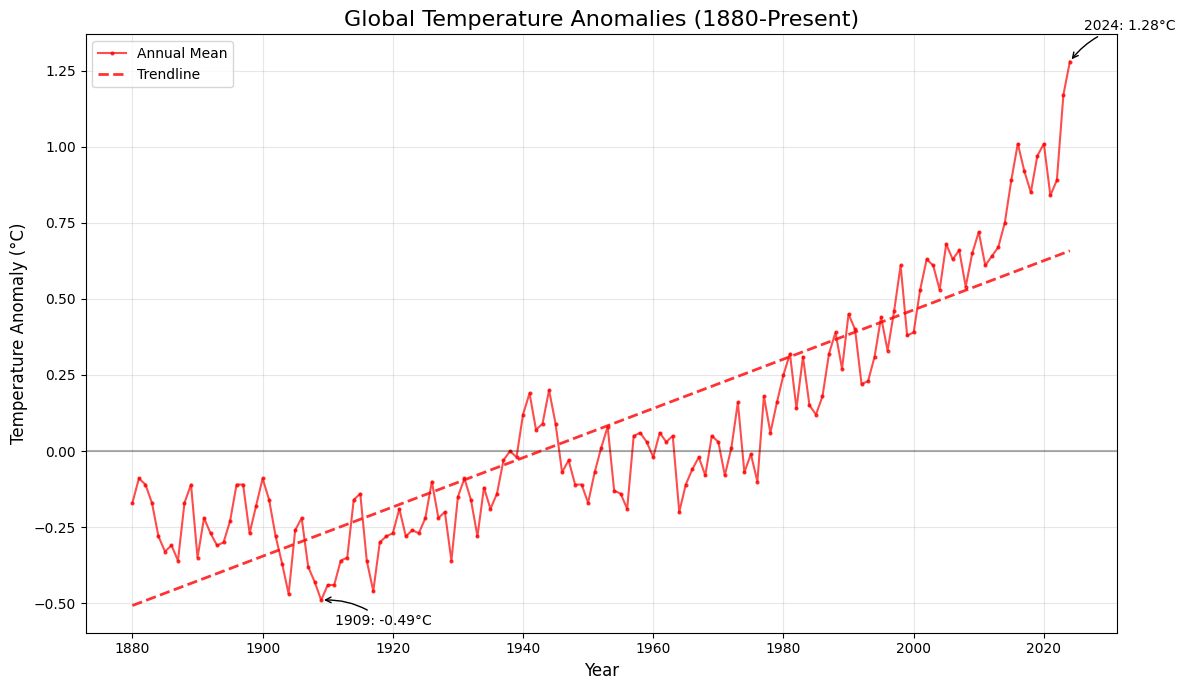

In [11]:

# Create figure with specified size
plt.figure(figsize=(12, 7))

# Plot the full data with custom styling
plt.plot(df['Year'], df['Annual_Mean'], color='red', linewidth=1.5, marker='o', 
         markersize=2, alpha=0.7, label='Annual Mean')

# Add a reference line at 0°C
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Create cleaned DataFrame for trendline only
years_numeric = df['Year'].dt.year.astype(float)
annual_mean_numeric = df['Annual_Mean'].astype(float)

# Add a trend line (using numpy's polyfit) with cleaned data
z = np.polyfit(years_numeric, annual_mean_numeric, 1)
p = np.poly1d(z)
plt.plot(df['Year'], p(years_numeric), "--", color='red', linewidth=2, alpha=0.8, label='Trendline')

# Customize the plot
plt.title('Global Temperature Anomalies (1880-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

warmest_year = df.loc[df['Annual_Mean'].idxmax()]
plt.annotate(f"{warmest_year['Year'].year}: {warmest_year['Annual_Mean']:.2f}°C",
             xy=(warmest_year['Year'], warmest_year['Annual_Mean']),
             xytext=(10, 23), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

coldest_year = df.loc[df['Annual_Mean'].idxmin()]
plt.annotate(f"{coldest_year['Year'].year}: {coldest_year['Annual_Mean']:.2f}°C",
             xy=(coldest_year['Year'], coldest_year['Annual_Mean']),
             xytext=(10, -18), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))


plt.tight_layout()
plt.show()


## 3. Advanced Plotting with Matplotlib Axes Objects

For even more control, we can use explicit `Figure` and `Axes` objects. This approach offers the most flexibility and is ideal for complex visualizations.

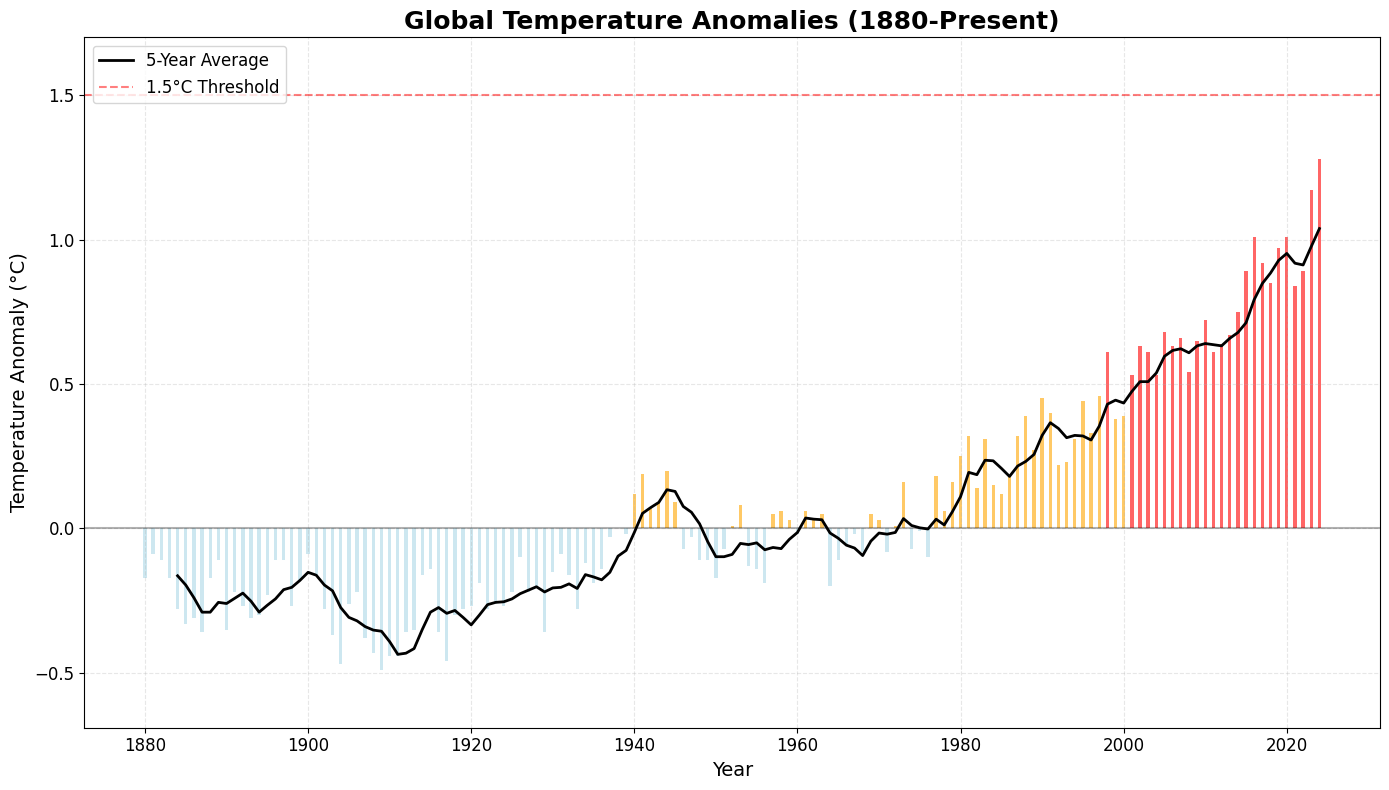

In [12]:
# Create a color map based on temperature
def temp_to_color(temp):
    """Convert temperature to a color (blue=cold, red=hot)"""
    if temp < -0.5:
        return 'blue'
    elif temp < 0:
        return 'lightblue'
    elif temp < 0.5:
        return 'orange'
    else:
        return 'red'

# Create colors for each data point
colors = [temp_to_color(temp) for temp in df['Annual_Mean']]

# Calculate 5-year rolling average
df['Five_Year_Avg'] = df['Annual_Mean'].rolling(window=5).mean()

# Create Figure and Axes objects
fig, ax = plt.subplots(figsize=(14, 8))

# Main temperature anomaly plot
ax.bar(df['Year'], df['Annual_Mean'], color=colors, width=150, alpha=0.6)
ax.plot(df['Year'], df['Five_Year_Avg'], color='black', linewidth=2, label='5-Year Average')

# Add reference lines
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax.axhline(y=1.5, color='red', linestyle='--', alpha=0.5, label='1.5°C Threshold')

# Customize the plot with more advanced options
ax.set_title('Global Temperature Anomalies (1880-Present)', fontsize=18, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Temperature Anomaly (°C)', fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a legend
ax.legend(loc='upper left', fontsize=12)

# Set y-axis limits with some padding
y_min = df['Annual_Mean'].min() - 0.2
y_max = max(df['Annual_Mean'].max() + 0.2, 1.7)  # Ensure the 1.5°C line is visible
ax.set_ylim(y_min, y_max)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

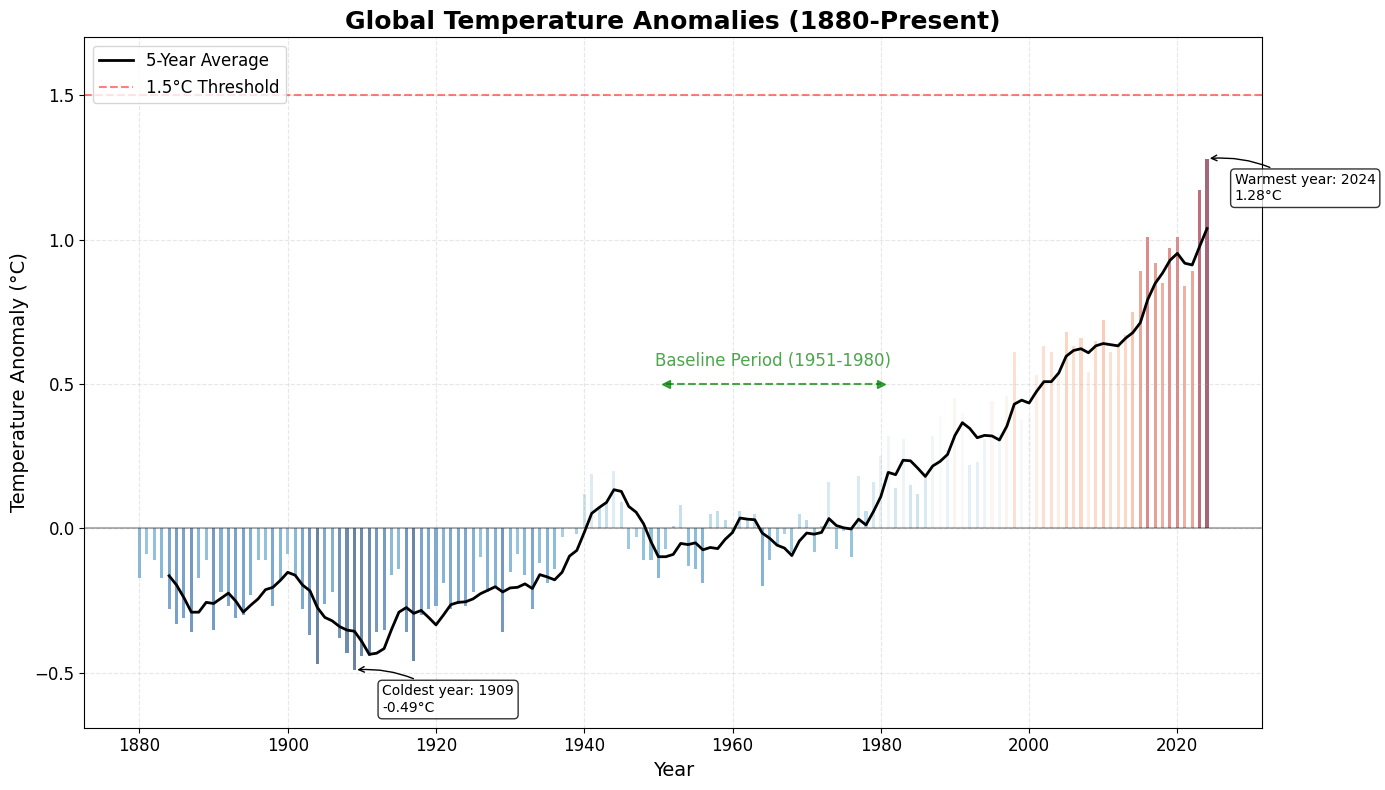

In [13]:
import matplotlib.colors as mcolors

# Create Figure and Axes objects
fig, ax = plt.subplots(figsize=(14, 8))

# Calculate 5-year rolling average
df['Five_Year_Avg'] = df['Annual_Mean'].rolling(window=5).mean()

# Define a continuous colormap
cmap = plt.get_cmap('RdBu_r')  # Red (warm) to Blue (cold), reversed
norm = mcolors.Normalize(vmin=df['Annual_Mean'].min(), vmax=df['Annual_Mean'].max())
colors = [cmap(norm(temp)) for temp in df['Annual_Mean']]

# Main temperature anomaly plot with continuous colors
bars = ax.bar(df['Year'], df['Annual_Mean'], color=colors, width=150, alpha=0.6)
ax.plot(df['Year'], df['Five_Year_Avg'], color='black', linewidth=2, label='5-Year Average')

# Add reference lines
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax.axhline(y=1.5, color='red', linestyle='--', alpha=0.5, label='1.5°C Threshold')

# Shade the 1951-1980 baseline period
baseline_start = pd.to_datetime('1951', format='%Y')
baseline_end = pd.to_datetime('1980', format='%Y')

# Add a horizontal line with arrows for the baseline period
ax.hlines(y=0.5, xmin=baseline_start, xmax=baseline_end, 
          colors='green', linestyles='--', lw=1.5, alpha=0.7)
ax.plot(baseline_start, 0.5, '<g', alpha=0.7)  # Left arrow
ax.plot(baseline_end, 0.5, '>g', alpha=0.7)    # Right arrow

# Add text above the line
midpoint = baseline_start + (baseline_end - baseline_start) / 2  # Calculate the midpoint of the period
ax.text(midpoint, 0.55, 'Baseline Period (1951-1980)', 
        ha='center', va='bottom', fontsize=12, color='green', alpha=0.7)

# Customize the plot with more advanced options
ax.set_title('Global Temperature Anomalies (1880-Present)', fontsize=18, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Temperature Anomaly (°C)', fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a legend
ax.legend(loc='upper left', fontsize=12)

# Add annotations
warmest_year = df.loc[df['Annual_Mean'].idxmax()]
ax.annotate(f"Warmest year: {warmest_year['Year'].year}\n{warmest_year['Annual_Mean']:.2f}°C",
            xy=(warmest_year['Year'], warmest_year['Annual_Mean']),
            xytext=(20, -30), textcoords='offset points',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Fix: Define coldest_year (was missing in original code)
coldest_year = df.loc[df['Annual_Mean'].idxmin()]
ax.annotate(f"Coldest year: {coldest_year['Year'].year}\n{coldest_year['Annual_Mean']:.2f}°C",
            xy=(coldest_year['Year'], coldest_year['Annual_Mean']),
            xytext=(20, -30), textcoords='offset points',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Set y-axis limits with some padding
y_min = df['Annual_Mean'].min() - 0.2
y_max = max(df['Annual_Mean'].max() + 0.2, 1.7)  # Ensure the 1.5°C line is visible
ax.set_ylim(y_min, y_max)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()